# Submit Quantum Circuit to the Cloud Platform

In this notebook, we introduce the API to submit tasks to quantum cloud platform.

In [1]:
import os
os.chdir("..")
import sys
sys.path.append('..')
import logging
logging.basicConfig(level=logging.WARN)

import matplotlib.pyplot as plt
from janusq.cloud_interface import submit, get_result
from janusq.data_objects.circuit import Circuit

In [2]:
# define a circuit
qc = Circuit([], n_qubits = 4)
qc.h(0, 0)
qc.cx(0, 1, 1)
qc.cx(1, 2, 2)
qc.cx(2, 3, 3)
print(qc)

     ┌───┐ ░       ░       ░       ░ 
q_0: ┤ H ├─░───■───░───────░───────░─
     └───┘ ░ ┌─┴─┐ ░       ░       ░ 
q_1: ──────░─┤ X ├─░───■───░───────░─
           ░ └───┘ ░ ┌─┴─┐ ░       ░ 
q_2: ──────░───────░─┤ X ├─░───■───░─
           ░       ░ └───┘ ░ ┌─┴─┐ ░ 
q_3: ──────░───────░───────░─┤ X ├─░─
           ░       ░       ░ └───┘ ░ 


In [3]:
# submit it to the cloud
result = submit(circuit=qc, label='GHZ', shots=3000, run_type='simulator', API_TOKEN="")

{'circuit': [[{'name': 'h', 'qubits': [0], 'params': []}], [{'name': 'cx', 'qubits': [0, 1], 'params': []}], [{'name': 'cx', 'qubits': [1, 2], 'params': []}], [{'name': 'cx', 'qubits': [2, 3], 'params': []}]], 'shots': 3000, 'run_type': 'simulator', 'label': 'GHZ', 'is_async': True, 'n_qubits': 4}


If the token is not valid, the circuit will be simulated locally. Otherwise, it will be executed on the cloud platform.

[0.49166667 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.50833333]


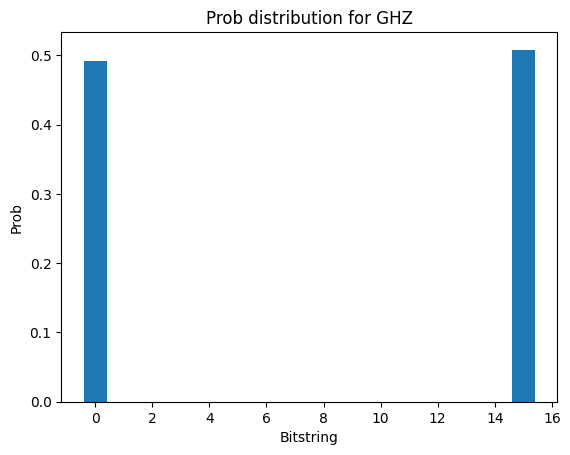

In [4]:
# get the result and plot the distribution
result_id = result['data']['result_id']
result = get_result(result_id, run_type='simulator', result_format='probs')
print(result)

x = range(len(result))

plt.bar(x, result)
plt.xlabel('Bitstring')
plt.ylabel('Prob')
plt.title('Prob distribution for GHZ')
plt.show()